# Part 1: Modeled Decay
The Graph Below models how Astatine decays, and eventually decays into the stable Isotope 207 for lead.  

In [6]:
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import pyplot as plt
import math


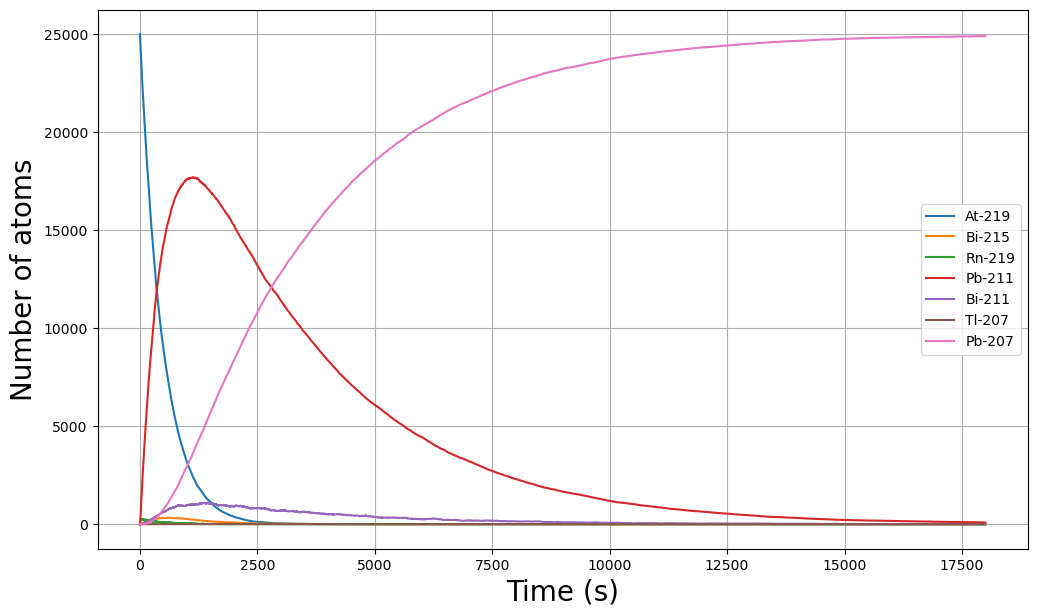

In [51]:
import numpy as np
import matplotlib.pyplot as plt


# Initial populations
At = 25000
Bi215 = 0
Rn = 0
Pb211 = 0
Bi211 = 0
Tl = 0
Pb207 = 0  


# Half-lives (seconds)
tau_At = 5.56 * 60
tau_Bi215 = 7.6 * 60
tau_Rn = 4
tau_Pb211 = 36.1 * 60
tau_Bi211 = 2.14 * 60
tau_Tl = 4.77 * 60

# timestep (s)
h = 1.0


# Decay probabilities

p_At = 1 - 2**(-h/tau_At)
p_Bi215 = 1 - 2**(-h/tau_Bi215)
p_Rn = 1 - 2**(-h/tau_Rn)
p_Pb211 = 1 - 2**(-h/tau_Pb211)
p_Bi211 = 1 - 2**(-h/tau_Bi211)
p_Tl = 1 - 2**(-h/tau_Tl)

# Radiation energies (MeV)
E_alpha = 4
E_beta = 3
E_R = 9
E_Z = 8

# Radiation counters
alpha_count = 0
beta_count = 0
R_count = 0
Z_count = 0

alpha_energy = 0
beta_energy = 0
R_energy = 0
Z_energy = 0


# Simulation time

tmax = 18000
tpoints = np.arange(0, tmax, h)


# Lists for plotting

Atpoints = []
Bi215points = []
Rnpoints = []
Pb211points = []
Bi211points = []
Tlpoints = []
Pb207points = []


# Decay counters per isotope

decays_At = 0
decays_Bi215 = 0
decays_Rn = 0
decays_Pb211 = 0
decays_Bi211 = 0
decays_Tl = 0



# MAIN SIMULATION LOOP
for t in tpoints:

    # Save populations
    Atpoints.append(At)
    Bi215points.append(Bi215)
    Rnpoints.append(Rn)
    Pb211points.append(Pb211)
    Bi211points.append(Bi211)
    Tlpoints.append(Tl)
    Pb207points.append(Pb207)

   
    # 1. At-219 decays
   
    if At > 0:
        decay_attempts = np.sum(np.random.random(At) < p_At)
        decays_At += decay_attempts

        # 97% beta, 3% alpha
        to_Rn = np.random.binomial(decay_attempts, 0.97)  
        to_Bi215 = decay_attempts - to_Rn

        At -= decay_attempts
        Rn += to_Rn
        Bi215 += to_Bi215

        # Radiation
        beta_count += to_Rn
        beta_energy += to_Rn * E_beta

        alpha_count += to_Bi215
        alpha_energy += to_Bi215 * E_alpha


    
    # 2. Rn-219 decays to Pb-211 (Z decay)
  
    if Rn > 0:
        decay_attempts = np.sum(np.random.random(Rn) < p_Rn)
        decays_Rn += decay_attempts

        Rn -= decay_attempts
        Pb211 += decay_attempts

        # Z radiation
        Z_count += decay_attempts
        Z_energy += decay_attempts * E_Z


    # 3. Bi-215 decays to Pb-211 (R decay)
    if Bi215 > 0:
        decay_attempts = np.sum(np.random.random(Bi215) < p_Bi215)
        decays_Bi215 += decay_attempts

        Bi215 -= decay_attempts
        Pb211 += decay_attempts

        # R radiation
        R_count += decay_attempts
        R_energy += decay_attempts * E_R


   
    # 4. Pb-211 decays to Bi-211 (β decay)
    if Pb211 > 0:
        decay_attempts = np.sum(np.random.random(Pb211) < p_Pb211)
        decays_Pb211 += decay_attempts

        Pb211 -= decay_attempts
        Bi211 += decay_attempts

        # Beta radiation
        beta_count += decay_attempts
        beta_energy += decay_attempts * E_beta


  
    # 5. Bi-211 decays (99.7% R, 0.3% α)
    if Bi211 > 0:
        decay_attempts = np.sum(np.random.random(Bi211) < p_Bi211)
        decays_Bi211 += decay_attempts

        to_Pb207 = np.random.binomial(decay_attempts, 0.997)  # R decay
        to_Tl = decay_attempts - to_Pb207                    # α decay

        Bi211 -= decay_attempts
        Pb207 += to_Pb207
        Tl += to_Tl

        # Radiation
        R_count += to_Pb207
        R_energy += to_Pb207 * E_R

        alpha_count += to_Tl
        alpha_energy += to_Tl * E_alpha


   
    # 6. Tl-207 decays to Pb-207 (β decay)
    if Tl > 0:
        decay_attempts = np.sum(np.random.random(Tl) < p_Tl)
        decays_Tl += decay_attempts

        Tl -= decay_attempts
        Pb207 += decay_attempts

        beta_count += decay_attempts
        beta_energy += decay_attempts * E_beta




fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

ax.plot(tpoints, Atpoints, label='At-219')
ax.plot(tpoints, Bi215points, label='Bi-215')
ax.plot(tpoints, Rnpoints, label='Rn-219')
ax.plot(tpoints, Pb211points, label='Pb-211')
ax.plot(tpoints, Bi211points, label='Bi-211')
ax.plot(tpoints, Tlpoints, label='Tl-207')
ax.plot(tpoints, Pb207points, label='Pb-207')

ax.set_xlabel("Time (s)", size=20)
ax.set_ylabel("Number of atoms", size=20)
ax.legend()
ax.grid(True)

plt.show()

In [52]:

print(" Isotope Decay Totals ")
print(" At-219  :", decays_At)
print(" Bi-215  :", decays_Bi215)
print(" Rn-219  :", decays_Rn)
print(" Pb-211  :", decays_Pb211)
print(" Bi-211  :", decays_Bi211)
print(" Tl-207  :", decays_Tl)
print(" Final Pb-207 :", Pb207)
print(" ")
print(" Radiation Totals ")
print("Alpha decays:", alpha_count)
print("Beta decays :", beta_count)
print("R decays    :", R_count)
print("Z decays    :", Z_count)
print(" ")
print(" Radiation Energies (MeV)")
print("Alpha energy:", alpha_energy)
print("Beta energy :", beta_energy)
print("R energy    :", R_energy)
print("Z energy    :", Z_energy)


 Isotope Decay Totals 
 At-219  : 25000
 Bi-215  : 720
 Rn-219  : 24280
 Pb-211  : 24911
 Bi-211  : 24902
 Tl-207  : 71
 Final Pb-207 : 24902
 
 Radiation Totals 
Alpha decays: 791
Beta decays : 49262
R decays    : 25551
Z decays    : 24280
 
 Radiation Energies (MeV)
Alpha energy: 3164
Beta energy : 147786
R energy    : 229959
Z energy    : 194240


In [53]:
def run_simulation():

    # Initial populations
    At = 25000
    Bi215 = 0
    Rn = 0
    Pb211 = 0
    Bi211 = 0
    Tl = 0
    Pb207 = 0

    # Radiation energies
    E_alpha = 4
    E_beta = 3
    E_R = 9
    E_Z = 8

    # Radiation counters
    alpha_energy = 0
    beta_energy = 0
    R_energy = 0
    Z_energy = 0

    # Decay counters (required for Part 1 but not needed in return)
    decays_At = decays_Bi215 = decays_Rn = 0
    decays_Pb211 = decays_Bi211 = decays_Tl = 0

    # Probabilities
    tau_At = 5.56 * 60
    tau_Bi215 = 7.6 * 60
    tau_Rn = 4
    tau_Pb211 = 36.1 * 60
    tau_Bi211 = 2.14 * 60
    tau_Tl = 4.77 * 60

    h = 1.0

    p_At = 1 - 2**(-h/tau_At)
    p_Bi215 = 1 - 2**(-h/tau_Bi215)
    p_Rn = 1 - 2**(-h/tau_Rn)
    p_Pb211 = 1 - 2**(-h/tau_Pb211)
    p_Bi211 = 1 - 2**(-h/tau_Bi211)
    p_Tl = 1 - 2**(-h/tau_Tl)

    tpoints = np.arange(0, 12500, h)

    for t in tpoints:

        # --- At decay ---
        if At > 0:
            decay_attempts = np.sum(np.random.random(At) < p_At)
            decays_At += decay_attempts

            to_Rn = np.random.binomial(decay_attempts, 0.97)
            to_Bi215 = decay_attempts - to_Rn

            At -= decay_attempts
            Rn += to_Rn
            Bi215 += to_Bi215

            beta_energy += to_Rn * E_beta
            alpha_energy += to_Bi215 * E_alpha


        if Rn > 0:
            decay_attempts = np.sum(np.random.random(Rn) < p_Rn)
            decays_Rn += decay_attempts

            Rn -= decay_attempts
            Pb211 += decay_attempts

            Z_energy += decay_attempts * E_Z

 
        if Bi215 > 0:
            decay_attempts = np.sum(np.random.random(Bi215) < p_Bi215)
            decays_Bi215 += decay_attempts

            Bi215 -= decay_attempts
            Pb211 += decay_attempts

            R_energy += decay_attempts * E_R


        if Pb211 > 0:
            decay_attempts = np.sum(np.random.random(Pb211) < p_Pb211)
            decays_Pb211 += decay_attempts

            Pb211 -= decay_attempts
            Bi211 += decay_attempts

            beta_energy += decay_attempts * E_beta

        
        if Bi211 > 0:
            decay_attempts = np.sum(np.random.random(Bi211) < p_Bi211)
            decays_Bi211 += decay_attempts

            to_Pb207 = np.random.binomial(decay_attempts, 0.997)
            to_Tl = decay_attempts - to_Pb207

            Bi211 -= decay_attempts
            Pb207 += to_Pb207
            Tl += to_Tl

            R_energy += to_Pb207 * E_R
            alpha_energy += to_Tl * E_alpha

        if Tl > 0:
            decay_attempts = np.sum(np.random.random(Tl) < p_Tl)
            decays_Tl += decay_attempts

            Tl -= decay_attempts
            Pb207 += decay_attempts

            beta_energy += decay_attempts * E_beta

    total_energy = alpha_energy + beta_energy + R_energy + Z_energy
    return alpha_energy, beta_energy, R_energy, Z_energy, total_energy


In [55]:
runs = 10  # or 20 or 50 for better stats

alpha_list = []
beta_list = []
R_list = []
Z_list = []
total_list = []

for i in range(runs):
    a, b, r, z, total = run_simulation()
    alpha_list.append(a)
    beta_list.append(b)
    R_list.append(r)
    Z_list.append(z)
    total_list.append(total)


print("Alpha Energy:")
print(" Mean:", np.mean(alpha_list))
print(" Std Dev:", np.std(alpha_list))
print(" ")
print("Beta Energy:")
print(" Mean:", np.mean(beta_list))
print(" Std Dev:", np.std(beta_list))
print(" ")
print("R Energy:")
print(" Mean:", np.mean(R_list))
print(" Std Dev:", np.std(R_list))
print(" ")
print("Z Energy:")
print(" Mean:", np.mean(Z_list))
print(" Std Dev:", np.std(Z_list))




Alpha Energy:
 Mean: 3398.4
 Std Dev: 70.0445572475121
 
Beta Energy:
 Mean: 146246.4
 Std Dev: 54.642840336131876
 
R Energy:
 Mean: 226157.4
 Std Dev: 325.67566688348086
 
Z Energy:
 Mean: 193775.2
 Std Dev: 145.61098859632816


In [57]:

#minimum required energy to block
min_wood = (np.mean(alpha_list)) + 3 * np.std(alpha_list)
min_water = (np.mean(beta_list)) + 3 * np.std(beta_list)
min_gold = (np.mean(R_list)) + 3 * np.std(R_list)
min_lead = (np.mean(Z_list)) + 3 * np.std(Z_list)

#blocking rates in MeV per cm
wood  = 1000   
water = 9000   
gold = 5000      
lead = 3000       


#cost (per cm) = 
cost_wood =  0.25     # $ per cm (Wood)
cost_Water =  1.25      # $ per cm (Water)
cost_Gold =  75.00        # $ per cm (Gold)
cost_Lead =  25.00         # $ per cm (Lead)

# Compute thickness (cm) and cost (dollars)
thickness_wood = (min_wood/ wood)
thickness_water = (min_water / water)
thickness_gold = (min_gold / gold)
thickness_lead = (min_lead / lead)

cost_alpha = round(thickness_wood , 2)* cost_wood
cost_beta  = round(thickness_water, 2) * cost_Water
cost_R     = round(thickness_gold , 2)* cost_Gold
cost_Z     = round(thickness_lead , 2) * cost_Lead

print("Thickness of Material")
print("Thickness of wood : " + str(round(thickness_wood,2)) + " cm") 
print("Thickness of water : " + str(round(thickness_water,2)) + " cm") 
print("Thickness of gold : " + str(round(thickness_gold,2)) + " cm") 
print("Thickness of lead : " + str(round(thickness_lead,2)) + " cm") 
print(" ") 
print("Total Cost For Each Material shield")
print ("Cost of wood : $" + str(round(cost_alpha, 2)))
print ("Cost of water : $" + str(round(cost_beta, 2)))
print ("Cost of gold: $" + str(round(cost_R, 2)))
print ("Cost of lead: $" + str(round(cost_Z, 2)))

Thickness of Material
Thickness of wood : 3.61 cm
Thickness of water : 16.27 cm
Thickness of gold : 45.43 cm
Thickness of lead : 64.74 cm
 
Total Cost For Each Material shield
Cost of wood : $0.9
Cost of water : $20.34
Cost of gold: $3407.25
Cost of lead: $1618.5
